# Question 1

Write a function to generate an input data matrix X of size NxD for regression.

a) Input: Sample size N and a generator matrix S of size MxD

b) Working: First generate a random 2-D array of size NxM where each column has a standard
normal distribution and is independent of the other columns. Then multiply this with the
generator matrix S of size MxD to give an output matrix X of size NxD. The idea here is that
if the generator matrix S of size MxD is an identity matrix, then each column of X will
remain independent; otherwise we can introduce correlations in the matrix columns of X

In [1]:
#import all relevant libraries
import numpy as np
import timeit
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

In [3]:
np.random.seed(0) #https://www.geeksforgeeks.org/random-seed-in-python/

In [4]:
def generate_X(N,S):  #defined the function according to question
    M = S.shape[0]   #finding the number of rows and columns of S
    D = S.shape[1]  #https://www.geeksforgeeks.org/find-the-number-of-rows-and-columns-of-a-given-matrix-using-numpy/
    random_arr=np.random.randn(N, M) #https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
    X=np.matmul(random_arr,S) #https://www.geeksforgeeks.org/multiplication-two-matrices-single-line-using-numpy-python/
    return X   # return the matrix X
    
    

# Question 2

Write a function to generate the target vector t of size Nx1: 

a) Input: Data matrix X of size NxD, weight vector w of size D+1 and noise variance σ

b) Working: Check for dimension mismatch between X and w, multiply X with w (sans one
element) and add the bias (the excluded element), then add zero-mean Gaussian noise
with variance σ.

In [5]:
def generate_t(X,w,sigma):  #defined the function according to question
    N,D=X.shape[0],X.shape[1] #find dimensions of X #https://www.geeksforgeeks.org/find-the-number-of-rows-and-columns-of-a-given-matrix-using-numpy/
    new_matrix = np.ones((N, D + 1)) #We need to convert the matrix X to NX(D+1) with first column all 1 so that on matrix multiplication it will include the bias w0
    new_matrix[:, 1:] = X #https://chat.openai.com/c/4679565e-269c-44e2-ba0d-17faa76b439e
    noise = np.random.normal(0,sigma,(N,1)) #https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
    t=np.matmul(new_matrix,w)+ noise #FIND PRODUCT OF X,W AND add NOISE . 
    return t #return target vector

# Question 3

Examine the behavior of the analytical solver based on pseudo-inverse (pinv) in numpy.linalg
package with respect to the size of the data matrix. Plot a graph of the time taken with respect to N
(use log scale for both axes), with D fixed to 10. Is there any strange behavior in time taken to solve
the problem above a particular value of N? What could be the reason for the same?

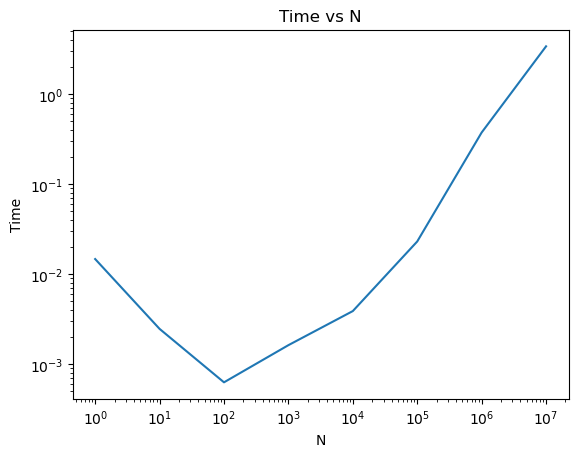

In [6]:
D=10   #given in question
delays=[]  #creating an empty array . All the time delay values will be appended in this array
N_array=[]  #creating an empty array for n values
for i in range(8):      #iterating for i
    N_array.append(10**i)  #creating the array of all N values [1,10,100,....]
    X=np.random.rand(10**i, D)  #https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html
    startTime = timeit.default_timer()   #https://www.geeksforgeeks.org/python-measure-time-taken-by-program-to-execute/
    B = np.linalg.pinv(X)  #https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html
    endTime = timeit.default_timer()   #https://www.geeksforgeeks.org/python-measure-time-taken-by-program-to-execute/
    delays.append(endTime-startTime)  #add it to the delay matrix


plt.xscale("log")  #https://www.geeksforgeeks.org/how-to-plot-logarithmic-axes-in-matplotlib/
plt.yscale("log")  #https://www.geeksforgeeks.org/how-to-plot-logarithmic-axes-in-matplotlib/
plt.xlabel('N')   #assigning label to x axis
plt.ylabel('Time') #assigning label to y axis
plt.title('Time vs N')  #assign title of the graph
plt.plot(N_array,delays)    #plotting the graph


The code crashes for N values at and above 10^8 . The time complexity varies as O(N^2.4) and time increases drastically .

# Question 4

Write a function to calculate the normalized root mean squared error (NRMSE) between a target
vector t and a predicted vector y.

In [7]:
def NRMSE(t,y): #t is of size NX1 AND Y OF NX1
    
    denom=(t.std())*np.sqrt(len(t)) # denom=std dev*sqrt(N)
    num = np.sqrt( np.sum([(t-y)**2]) )       #nrmse = rmse/std dev https://www.javatpoint.com/numpy-std#:~:text=std()%2C%20used%20to%20compute,known%20as%20the%20standard%20deviation. 
                                                     #https://numpy.org/doc/stable/reference/generated/numpy.sum.html
    nrmse=num/denom #divide num/denom
    return nrmse #return the value of nrmse    
    

# Question 5

Write a function to calculate gradient of mean squared error (MSE) with respect to weights of
linear regression. Figure out what should be the inputs and outputs.

In [8]:
def grad_MSE(T,W,X): #assuming t is of size NX1 , X of NXD and w of (D+1)X1 as given in previous questions
    N,D=X.shape[0],X.shape[1] #finding dimensions of X (reference already given in previous questions)
    new_matrix = np.ones((N, D + 1)) #We need to convert the matrix X to NX(D+1) with first column all 1 so that on matrix multiplication it will include the bias w0 #https://chat.openai.com/share/3d3e99ee-38ae-4f76-89fc-0d8e74e3a534
    new_matrix[:, 1:] = X #https://chat.openai.com/share/3d3e99ee-38ae-4f76-89fc-0d8e74e3a534
    y=np.matmul(new_matrix,W) #find y=Xw  #https://www.geeksforgeeks.org/multiplication-two-matrices-single-line-using-numpy-python/
    N=len(T)  #N=length of target vector
    error=[]   #error matrix (NX1)
    for i in range(N): # iterating over all N
        error.append( [ T[i][0]-y[i][0]] )  #find errors for all N  
    error=np.array(error) #convert to np array form https://www.w3schools.com/python/numpy/numpy_creating_arrays.asp
    grad=-np.matmul(new_matrix.transpose(),error) / N   #https://math.stackexchange.com/questions/1962877/compute-the-gradient-of-mean-square-error
    return grad #return the gradient , it will be D+1X1 each row i has gradient with respect to ith weight and the previous line sets the gradient w.r.t to w0 to 0 
    

# Question 6 

 Write a function to calculate gradient of L2 norm of weights with respect to weights. 

In [9]:
def grad_L2_norm(W):  #define the function with input weight matrix [w0,w1,w2....wd]T (D+1X1 matrix)
    squared_sum=0 #initialise the sum of squares to 0
    for j in range(1,len(W)):  #iterating over all elements of W except bias
        squared_sum+= (W[j][0])**2 #find sum of squares of weights
    L2_norm=math.sqrt(squared_sum) #find L2 norm by taking square root of sum of squares
    grad=[[0]] #initialise the gradient matrix it will be D+1X1 with w[0][0]=0
    for i in range(1,len(W)): #iterate over all elements of W
        grad.append([W[i][0]/L2_norm]) #each ith row will have grad w.r.t ith weight given by wj/L2 norm
    return np.array(grad) #return the grad matrix

# Question 7

Write a function to calculate gradient of L1 norm of weights with respect to weights.

In [10]:
def grad_L1_norm(W): #define the function with input weight matrix [w0,w1,w2....wd]T (D+1X1 matrix)
    grad= np.sign(W) #https://www.geeksforgeeks.org/numpy-sign-in-python/ #if w is positive slope will be +1 and -1 otherwise
    grad[0]=[0]  #first element will be wrt to bias and will be set to 0
    return np.array(grad) #return the grad matrix
                    

# Question 8

Write a function to perform gradient descent on MSE + λ1 L1 + λ2 L2 for linear regression. Use an
appropriate stopping criterion

In [11]:
def grad_descent(T,X,lmb_1,lmb_2,learning_rate): #define the function with inputs Weight,Target,Data matrix X, Parameters lambda 1 and lambda 2 and learning rate
    D=X.shape[1] #find D (Number of columns of X)
    W_old=np.ones((D+1,1))  #initialise W_old to all ones
    for _ in range(1000): #run for 1000 iterations
        W_new=W_old- learning_rate*( lmb_1*grad_L1_norm(W_old)+lmb_2*grad_L2_norm(W_old)*np.linalg.norm(W_old)+grad_MSE(T,W_old,X) ) #compute new weights as old weights-learning rate*gradient
        if np.linalg.norm(lmb_1*grad_L1_norm(W_new)+lmb_2*grad_L2_norm(W_new)*np.linalg.norm(W_new)+grad_MSE(T,W_new,X))<0.001: #stop the loop once the error starts increasing again i.e when gradient tends to 0 #https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
            break
        W_old=W_new  #update the weights and set the old weights to the new weights
    return W_new #return the new optimal weights

When the norm of gradient becomes sufficiently small we stop the loop

# Question 9

Examine the impact of σ on the NRMSE for linear regression using gradient descent. Average the
results of the following experiment run five times for each value of σ where G is an identity matrix.
Generate a random data matrix X and target vector t with noise variance σ, and split it into training
and validation sub-matrices and sub-vectors. Train using gradient descent on training subset, and
test on the validation subset. Plot average NRMSE on validation subset for five runs versus σ.
Comment on the results

0.020083487615369062
0.07482970963516927
0.10412634035143545
0.20278318644716728
0.23646155478164296


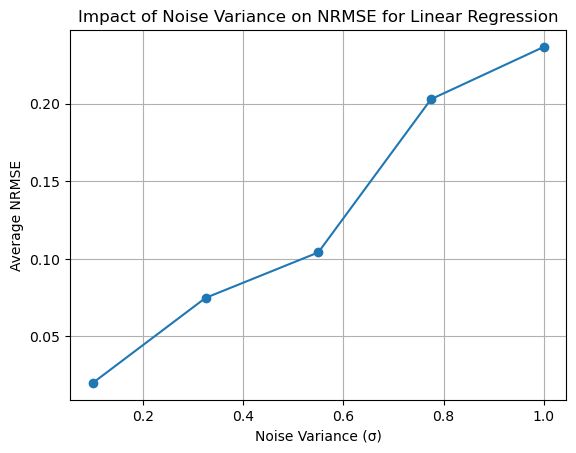

In [12]:
sigmas = np.linspace(0.1, 1,5) #generate an array of sigma values https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
N=100 #set N=100
D=25  #set D=25
G=np.eye(D) #Generator matrix is identity with dimension D https://numpy.org/devdocs/reference/generated/numpy.eye.html
X=generate_X(N,G) #generate data matrix X
wi=np.random.randn(D+1,1) #set initial weights for generating the target vector
nrmse_arr=[] #create an empty array for storing nrmse values
train_size = int(0.8 * N)  # 80% for training, 20% for validation  #https://chat.openai.com/share/68fc3fa9-61dc-41f1-bf8e-27ed9fb78751
for s in sigmas: #iterating for all sigmas
    T= generate_t(X,wi,s) #generate target vector with initial weights
    X_train, X_val = X[:train_size], X[train_size:] #https://chat.openai.com/share/68fc3fa9-61dc-41f1-bf8e-27ed9fb78751
    T_train, T_val = T[:train_size], T[train_size:] #https://chat.openai.com/share/68fc3fa9-61dc-41f1-bf8e-27ed9fb78751
    nrmse=0  #initialise it to 0
    for i in range(5): #run for 5 iterations as per the question
        W_optimal = grad_descent(T_train, X_train, 0, 0, 0.1) #find optimal weights
        new_matrix = np.ones((X_val.shape[0], X_val.shape[1] + 1)) #We need to convert the matrix X to NX(D+1) with first column all 1 so that on matrix multiplication it will include the bias w0
        new_matrix[:, 1:] = X_val #https://chat.openai.com/share/3d3e99ee-38ae-4f76-89fc-0d8e74e3a534
        y=np.matmul(new_matrix,W_optimal) #find y=Xw 
        nrmse+=NRMSE(T_val,y) #sum them up

    print(nrmse/5) #print average nrmse values
    nrmse_arr.append(nrmse/5) #take average
#reference for graph plotting:https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
plt.plot(sigmas, nrmse_arr, marker='o') #plotting the graph
plt.xlabel('Noise Variance (σ)')   #give label to x-axis
plt.ylabel('Average NRMSE') #give label to y-axis
plt.title('Impact of Noise Variance on NRMSE for Linear Regression') #giving title to graph
plt.grid(True) #set grid lines to true
plt.show()  #display the graph
      
        

As the noise variance increases the average value for nrmse increases

# Question 10

Examine the impact of N and λ2 on the NRMSE for linear regression using gradient descent.
Create lists of N and λ2 values (use log scale, 5 each, 25 pairs). Average the results of the following
experiment run five times for combination of N and λ2 value pair for a fixed generator matrix G and
noise variance σ. Comment on the results. 

In [13]:
N=[100,500,1000,5000,10000] #N values
lmb=[0.1,1,2,5,10] #Lambda 2 VALUES
D=25 #set D value
wi=np.random.randn(D+1,1) #set initial weights for generating the target vector
noise=0.1 #set the noise variance
G=np.eye(D) #use fixed identity generator matrix https://numpy.org/devdocs/reference/generated/numpy.eye.html
nrmse_arr=np.zeros((5,5)) #https://pythonguides.com/python-numpy-2d-array/ #initialise it to all zeros #initialise the array to all 0s
for i in range(len(N)): #iterate over all N values
    for j in range(len(lmb)): #iterate over all λ2 values 
        nrmse=0  #initialise it to 0
        for _ in range(5): #run this for 5 iterations
            X=generate_X(N[i],G) #generate data matrix X
            T= generate_t(X,wi,noise) #creating a random test matrix
            train_size = int(0.8 * N[i])  # 80% for training, 20% for validation  #https://chat.openai.com/share/68fc3fa9-61dc-41f1-bf8e-27ed9fb78751
            X_train, X_val = X[:train_size], X[train_size:] #https://chat.openai.com/share/68fc3fa9-61dc-41f1-bf8e-27ed9fb78751
            T_train, T_val = T[:train_size], T[train_size:] #https://chat.openai.com/share/68fc3fa9-61dc-41f1-bf8e-27ed9fb78751
            W_optimal = grad_descent( T_train, X_train, 0, lmb[j], 0.01) #find optimal weights
            new_matrix = np.ones((X_val.shape[0], X_val.shape[1] + 1)) #We need to convert the matrix X to NX(D+1) with first column all 1 so that on matrix multiplication it will include the bias w0
            new_matrix[:, 1:] = X_val #https://chat.openai.com/share/3d3e99ee-38ae-4f76-89fc-0d8e74e3a534
            y=np.matmul(new_matrix,W_optimal) #find y=Xw 
            nrmse+=NRMSE(T_val,y) #sum them up
        nrmse_arr[i][j]=(nrmse/5) #take average
        

        
          

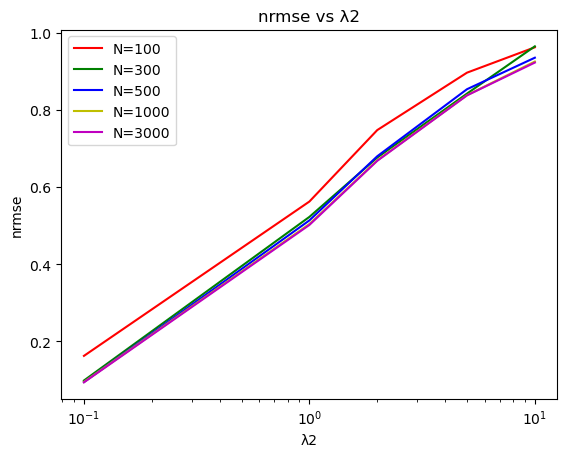

In [14]:
#NRMSE_ARR[i] will have values corresponding to N values
nrmse_10=nrmse_arr[0]
nrmse_100=nrmse_arr[1]
nrmse_1000=nrmse_arr[2]
nrmse_10000=nrmse_arr[3]
nrmse_100000=nrmse_arr[4]
X=lmb # set x axis to lmbda values
#reference for graph plotting:https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
plt.plot(X, nrmse_10, color='r', label='N=100') 
plt.plot(X, nrmse_100, color='g', label='N=300') 
plt.plot(X, nrmse_1000, color='b', label='N=500') 
plt.plot(X, nrmse_10000, color='y', label='N=1000')
plt.plot(X, nrmse_100000, color='m', label='N=3000')
# Naming the x-axis, y-axis and the whole graph 

plt.xscale("log")
plt.xlabel("λ2") 
plt.ylabel("nrmse") 
plt.title("nrmse vs λ2") 
  
# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

NRMSE is increasing with lambda

# Question 11

Examine the impact of λ1 on variable elimination. Generate a single data matrix X and plot
weights versus 1/λ1. Comment on the results. Introduce correlations in the columns of X and repeat
the experiment. Are the results different? Comment on the results.

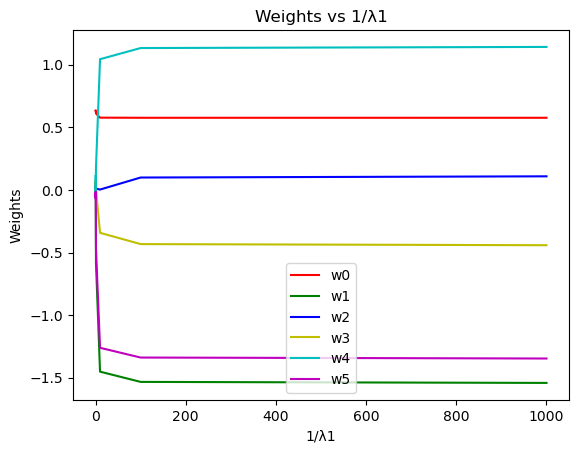

In [31]:
N=500 #set N value
D=5  #set D value
G=np.eye(D) #Generator matrix is identity with dimension D  https://numpy.org/devdocs/reference/generated/numpy.eye.html
X=generate_X(N,G) #generate data matrix X
wi=np.random.randn(D+1,1) #set initial weights for generating the target vector
T=generate_t(X,wi,0.1) #creating a random test matrix
w=np.random.randn(D+1,1) #initialise random weights
l1_values=[0.001,0.01,0.1,1,2,4,6,8,10] #λ1 values
weights=[] #initialise empty list to store weights 
for l1 in l1_values: #iterating for all λ1 values  
    W_optimal = grad_descent(T, X, l1, 0, 0.01) #find optimal weights 
    weights.append(W_optimal) #append these values to my weight array

lmb_inv=[1/l1 for l1 in l1_values] #find 1/λ1
 
#find values of weights and store in array . ith weight will be the ith element from each row(or item) of weights matrix 
#ref for next 6 lines : #https://chat.openai.com/share/0ee5d287-45e8-47fc-8337-107ddde8624b
w0=[row[0][0] for row in weights] 
w1=[row[1][0] for row in weights]
w2=[row[2][0] for row in weights]
w3=[row[3][0] for row in weights]
w4=[row[4][0] for row in weights]
w5=[row[5][0] for row in weights]

X=lmb_inv #set x-axis to 1/λ1
#reference for graph plotting:https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
plt.plot(X, w0, color='r', label='w0') 
plt.plot(X, w1, color='g', label='w1') 
plt.plot(X, w2, color='b', label='w2') 
plt.plot(X, w3, color='y', label='w3')
plt.plot(X, w4, color='c', label='w4') 
plt.plot(X, w5, color='m', label='w5') 

# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("1/λ1") 
plt.ylabel("Weights") 
plt.title("Weights vs 1/λ1") 
  
# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()
        

Now we introduce correlations in columns of X : Generator matrix wont be identity in this case

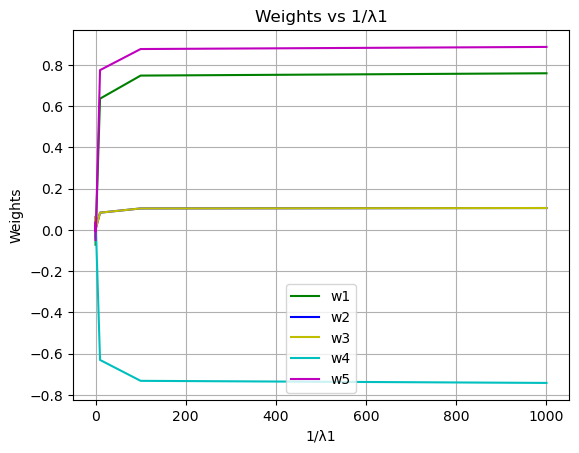

In [32]:
N=500 #set N value
D=5  #set D value
G=np.eye(D) #Generator matrix is identity with dimension D https://numpy.org/devdocs/reference/generated/numpy.eye.html
#next two lines introduce correlations by setting two columns of generator matrix as same 
G[1][2]=1
G[2][1]=1

X=generate_X(N,G) #generate data matrix X
wi=np.random.randn(D+1,1) #initialise the initital weights for generating the target matrix
T=generate_t(X,wi,0.1) #creating a random test matrix
w=np.random.randn(D+1,1) #initialise random weights
nrmse_arr=[] #create an empty array for storing nrmse values
l1_values=[0.001,0.01,0.1,1,2,4,6,8,10] # λ1 values array
weights=[] #initialise empty list to store weights
for l1 in l1_values: #iterate over all values of λ1
    W_optimal = grad_descent( T, X, l1, 0, 0.01) #find optimal weights
    weights.append(W_optimal) ##append these values to my weight array
    
lmb_inv=[1/l1 for l1 in l1_values] #find 1/λ1
 #find values of weights and store in array . ith weight will be the ith element from each row(or item) of weights matrix 
#ref for next 6 lines : #https://chat.openai.com/share/0ee5d287-45e8-47fc-8337-107ddde8624b
w0=[row[0][0] for row in weights]
w1=[row[1][0] for row in weights]
w2=[row[2][0] for row in weights]
w3=[row[3][0] for row in weights]
w4=[row[4][0] for row in weights]
w5=[row[5][0] for row in weights]
X=lmb_inv #set x-axis to 1/λ1

#reference for graph plotting:https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
plt.plot(X, w1, color='g', label='w1') 
plt.plot(X, w2, color='b', label='w2') 
plt.plot(X, w3, color='y', label='w3')
plt.plot(X, w4, color='c', label='w4') 
plt.plot(X, w5, color='m', label='w5') 
  
# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("1/λ1") 
plt.ylabel("Weights") 
plt.title("Weights vs 1/λ1") 
  
# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
plt.grid(True)  
# To load the display window 
plt.show()
        

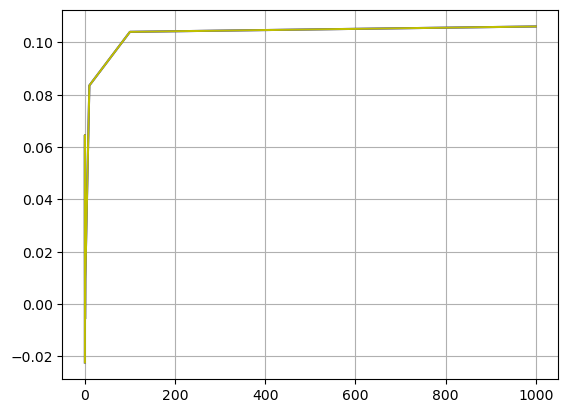

In [33]:
#plotting only w2 and w3
plt.plot(X, w2, color='b', label='w2') 
plt.plot(X, w3, color='y', label='w3')
plt.grid(True)


The results are different . In 2nd case after introducing correlations , some weights followed exactly the same nature (w2 and w3 in this case) . And for large values of lambda_1 all the weights are tending to 0

# Question 12

Show the grouping effect of elastic net on correlated columns of X.

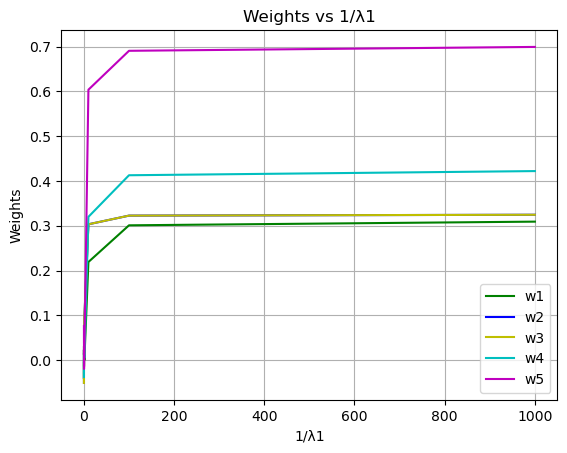

In [34]:
N=500 #set N value
D=5  #set D value
G=np.eye(D) #Generator matrix is identity with dimension D https://numpy.org/devdocs/reference/generated/numpy.eye.html
#next two lines introduce correlations by setting two columns of generator matrix as same
G[1][2]=1
G[2][1]=1
X=generate_X(N,G) #generate data matrix X
wi=np.random.randn(D+1,1) #initialise the initital weights for generating the target matrix
T=generate_t(X,wi,0.1) #creating a random test matrix
w=np.random.randn(D+1,1) #initialise random weights
nrmse_arr=[] #create an empty array for storing nrmse values
l1_values=[0.001,0.01,0.1,1,2,4,6,8,10] # λ1 values array
weights=[] #initialise empty list to store weights
for l1 in l1_values: #iterate over all values of λ1
    W_optimal = grad_descent( T, X, l1, 0.1, 0.01) #find optimal weights
    weights.append(W_optimal) #append these values to my weight array
    
lmb_inv=[1/l1 for l1 in l1_values] #find 1/λ1

#find values of weights and store in array . ith weight will be the ith element from each row(or item) of weights matrix 
#ref for next 6 lines : #https://chat.openai.com/share/0ee5d287-45e8-47fc-8337-107ddde8624b
w0=[row[0][0] for row in weights]
w1=[row[1][0] for row in weights]
w2=[row[2][0] for row in weights]
w3=[row[3][0] for row in weights]
w4=[row[4][0] for row in weights]
w5=[row[5][0] for row in weights]
X=lmb_inv #set x-axis to 1/λ1
#reference for graph plotting:https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/

plt.plot(X, w1, color='g', label='w1') 
plt.plot(X, w2, color='b', label='w2') 
plt.plot(X, w3, color='y', label='w3')
plt.plot(X, w4, color='c', label='w4') 
plt.plot(X, w5, color='m', label='w5') 
  
# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("1/λ1") 
plt.ylabel("Weights") 
plt.title("Weights vs 1/λ1") 
  
# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
plt.grid(True)  
# To load the display window 
plt.show()
   
   

Similar to Question 11 but value of λ2 is non zero(0.1) in this case . The correlated variables are tending to 0 at the same time (grouping effect of elastic net)

# Question 13

Write a function for generating linear binary classification vector t with noise variance σ.

In [15]:
def generate_linear_classifier(X,W,sigma): #takes input as data matrix X,weights and sigma 
    t=generate_t(X,W,sigma) #generate wTX+noise
    return np.sign(t)  #return the sign(as per the definition of classifier)

# Question 14

Write a function for computing gradient of binary cross-entropy for logistic regression.

In [16]:
def grad_bce(T,W,X): #assuming t is of size NX1 , X of NXD and w of (D+1)X1 as given in previous questions
    N,D=X.shape[0],X.shape[1] #FIND NUMBER OF ROWS AND COLUMNS OF X
    new_matrix = np.ones((N, D + 1)) #We need to convert the matrix X to NX(D+1) with first column all 1 so that on matrix multiplication it will include the bias w0
    new_matrix[:, 1:] = X #https://chat.openai.com/c/4679565e-269c-44e2-ba0d-17faa76b439e
    h=np.matmul(new_matrix,W) #find h=Xw
    z=[] #initialise empty array for sigmoid values
    for i in range(len(h)): #iterating over all elements of h
        z.append([1/ (1+np.exp(-h[i][0] ) ) ]) #appending the sigmoid value ref: https://numpy.org/doc/stable/reference/generated/numpy.exp.html
    N=len(T)  #N=length of target vector
    error=[]   #error matrix (NX1)
    for i in range(N): # iterating over all N
        error.append( [ z[i][0]-T[i][0] ] )  #find z-t for all N  
    error=np.array(error) ##convert to np array form https://www.w3schools.com/python/numpy/numpy_creating_arrays.asp
    grad=-np.matmul(new_matrix.transpose(),error)  #https://math.stackexchange.com/questions/2503428/derivative-of-binary-cross-entropy-why-are-my-signs-not-right
    return grad #return the gradient , it will be D+1X1 each row i has gradient with respect to ith weight 

# Question 15


Repeat experiment 10 for binary classification. 

Same as question 10 but gradient of loss function will have gradient of binary cross entropy

In [18]:
def grad_descent_bce(T,X,lmb_1,lmb_2,learning_rate): #define the function with inputs Weight,Target,Data matrix X, Parameters lambda 1 and lambda 2 and learning rate
    D=X.shape[1] #find D
    W_old=np.ones((D+1,1)) #initialise W_old to all 1s
    for _ in range(1000): #run for 1000 iteration
        W_new=W_old- learning_rate*( lmb_1*grad_L1_norm(W_old)+lmb_2*grad_L2_norm(W_old)*np.linalg.norm(W_old)+grad_bce(T,W_old,X) ) #compute new weights as old weights-learning rate*gradient
        if np.linalg.norm(lmb_1*grad_L1_norm(W_new)+lmb_2*grad_L2_norm(W_new)*np.linalg.norm(W_new)+grad_bce(T,W_new,X))<0.001: #stop the loop once the norm becomes very small
            break
        W_old=W_new  #update the weights and set the old weights to the new weights
    return W_new#return the new optimal weights
    
    
N=[100,300,500,1000,3000] #N values
lmb=[0.0001,0.001,0.01,0.1,1] #Lambda 2 VALUES #Lambda 2 VALUES
D=25 #set D value
wi=np.random.randn(D+1,1) #initialise random weights to generate target vector
noise=0.1 #set the noise

G=np.eye(D) #use fixed identity generator matrix https://numpy.org/devdocs/reference/generated/numpy.eye.html
nrmse_arr=np.zeros((5,5)) #https://pythonguides.com/python-numpy-2d-array/ #initialise it to all zeros #initialise the array to all 0s
for i in range(len(N)): #iterate over all N values
    for j in range(len(lmb)): #iterate over all λ2 values 
        nrmse=0  #initialise it to 0
        for _ in range(5): #run this for 5 iterations
            X=generate_X(N[i],G) #generate data matrix X
            T= generate_linear_classifier(X,wi,noise) #creating a random test matrix
            w=np.random.randn(D+1,1) #initialise random weights
            train_size = int(0.8 * N[i])  # 80% for training, 20% for validation  #https://chat.openai.com/share/68fc3fa9-61dc-41f1-bf8e-27ed9fb78751
            X_train, X_val = X[:train_size], X[train_size:] #https://chat.openai.com/share/68fc3fa9-61dc-41f1-bf8e-27ed9fb78751
            T_train, T_val = T[:train_size], T[train_size:] #https://chat.openai.com/share/68fc3fa9-61dc-41f1-bf8e-27ed9fb78751
            W_optimal = grad_descent_bce( T_train, X_train, 0, lmb[j],0.01) #find optimal weights
            new_matrix = np.ones((X_val.shape[0], X_val.shape[1] + 1)) #We need to convert the matrix X to NX(D+1) with first column all 1 so that on matrix multiplication it will include the bias w0
            new_matrix[:, 1:] = X_val #https://chat.openai.com/share/3d3e99ee-38ae-4f76-89fc-0d8e74e3a534
            y=np.sign(np.matmul(new_matrix,W_optimal)) #find y=Xw 
            nrmse+=NRMSE(T_val,y) #sum them up
        nrmse_arr[i][j]=(nrmse/5) #take average
        

        
          

C:\Users\mrudal\AppData\Local\Temp\ipykernel_24304\2771130696.py:8: RuntimeWarning: overflow encountered in exp
  z.append([1/ (1+np.exp(-h[i][0] ) ) ]) #appending the sigmoid value ref: https://numpy.org/doc/stable/reference/generated/numpy.exp.html


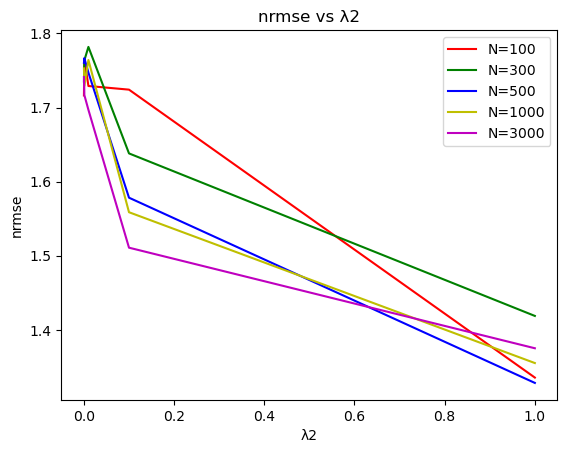

In [19]:
#NRMSE_ARR[i] will have values corresponding to N values
nrmse_10=nrmse_arr[0]
nrmse_100=nrmse_arr[1]
nrmse_1000=nrmse_arr[2]
nrmse_10000=nrmse_arr[3]
nrmse_100000=nrmse_arr[4]
X=lmb # set x axis to lmbda values
#reference for graph plotting:https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/

plt.plot(X, nrmse_10, color='r', label='N=100') 
plt.plot(X, nrmse_100, color='g', label='N=300') 
plt.plot(X, nrmse_1000, color='b', label='N=500') 
plt.plot(X, nrmse_10000, color='y', label='N=1000')
plt.plot(X, nrmse_100000, color='m', label='N=3000')
# Naming the x-axis, y-axis and the whole graph 
plt.xlabel("λ2") 
plt.ylabel("nrmse") 
plt.title("nrmse vs λ2") 
  
# Adding legend, which helps us recognize the curve according to it's color 
plt.legend() 
  
# To load the display window 
plt.show()

NRMSE decreases with lambda

In [20]:
W_optimal

array([[ 2.16516722e+04],
       [ 2.20894846e+00],
       [-3.61415680e+00],
       [ 1.42672522e+00],
       [-4.52006162e-01],
       [-6.96865434e+00],
       [-1.86412111e+00],
       [-6.01475034e+00],
       [ 4.25430511e+00],
       [-9.47313123e+00],
       [-6.25155025e+00],
       [-7.37645173e+00],
       [-6.55046141e+00],
       [-1.30063320e+00],
       [-1.35678306e+00],
       [ 7.85236912e-02],
       [-4.81030228e+00],
       [ 1.96331814e-01],
       [ 3.81766482e+00],
       [-1.83520454e-01],
       [-2.39945461e+00],
       [ 4.41066814e+00],
       [-5.90750407e+00],
       [ 4.50762833e-01],
       [-3.96117024e+00],
       [ 7.27186055e+00]])